In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from aps_ai.beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution
import beamline34IDC.optimization.common as opt_common
from aps_ai.beamline34IDC.optimization.scipy_nelder_mead import ScipyOptimizer
from aps_ai.beamline34IDC.optimization.skopt_gp import SkoptGaussianProcessOptimizer, SkoptDiscreteGPOptimizer
from aps_ai.beamline34IDC.optimization.display_utils import LivePlotCallback

import beamline34IDC.optimization.movers as movers
from aps_ai.beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
import glob
import shutil

In [3]:

from aps_ai.beamline34IDC.simulation.facade.focusing_optics_interface import Movement

In [4]:
%matplotlib inline

In [5]:
DEFAULT_RANDOM_SEED = np.random.randint(100000)
print(DEFAULT_RANDOM_SEED)

97415


In [6]:
base_dir = '/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/'
orig_work_dir = f'{base_dir}/work_directory'
temp_work_dir = f'{base_dir}/tmp_work_dir_{DEFAULT_RANDOM_SEED}'

In [7]:
os.mkdir(temp_work_dir)

In [8]:
dat_files = glob.glob(f'{orig_work_dir}/*.dat') + glob.glob(f'{orig_work_dir}/*.ini')
for df in dat_files:
    shutil.copy(df, temp_work_dir)

In [9]:
os.chdir(temp_work_dir)

In [10]:
input_beam_path = "primary_optics_system_beam.dat"

In [11]:
move_motors = ['hkb_2']

In [12]:
motors_str = move_motors[0] if len(move_motors) == 1 else '_'.join(move_motors)
fig_save_path = f'{orig_work_dir}/figures/{motors_str}/'
if not os.path.isdir(fig_save_path):
    os.mkdir(fig_save_path)

In [26]:
focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)

In [27]:
initial_absolute_positions = np.array(movers.get_absolute_positions(focusing_system, move_motors))
print(initial_absolute_positions)

(0.2500515, 0.1570341)
(0.2500515, 0.1570341)
[0.1570341]


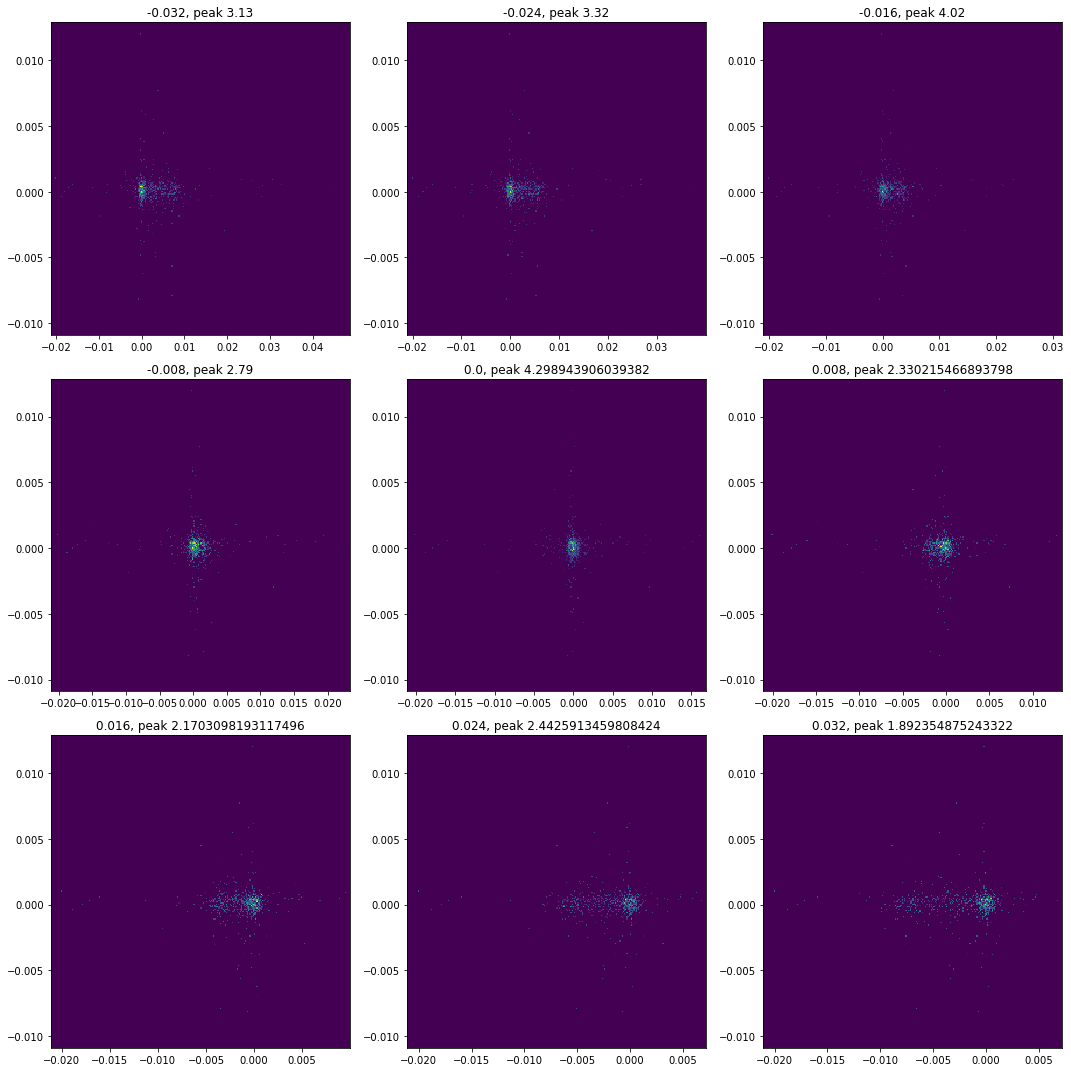

In [56]:
fig, axs = plt.subplots(3, 3, figsize=[15, 15])
axs = axs.flatten()

m = 0.008

for i in range(5):
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         translations=initial_absolute_positions + m * i, 
                                         movement='absolute')
    beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    axs[4 + i].pcolormesh(hist.hh, hist.vv, hist.data_2D)
    pk = dw.get_parameter('peak_intensity')
    axs[4 + i].set_title(f'{m * i}, peak {pk}')
    
    if i == 0: continue
    
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         translations=initial_absolute_positions - m * i, 
                                         movement='absolute')
    beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    axs[4 - i].pcolormesh(hist.hh, hist.vv, hist.data_2D)
    
    pk = dw.get_parameter('peak_intensity')
    axs[4 - i].set_title(f'{-m * i}, peak {pk:2.2f}')
plt.tight_layout()
    
    

  0%|          | 0/5 [00:00<?, ?it/s]

Random guess [-0.015786081916459187] has loss 0.0023847978365859955
Initial motor position is [0.14124802]
Initial loss is 0.0023847978365859955
motors ['hkb_2'] trans [-0.00055349] current loss 0.003342044351481342


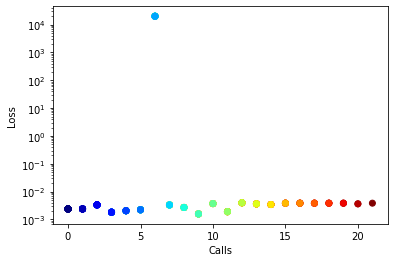

motors ['hkb_2'] trans [0.00898191] current loss 0.0018263213679505928
motors ['hkb_2'] trans [0.01993212] current loss 0.0020621017881467013
motors ['hkb_2'] trans [0.02824648] current loss 0.002229085215722874
motors ['hkb_2'] trans [-0.03904919] current loss 20000.0
motors ['hkb_2'] trans [-0.01400046] current loss 0.0033221764479822386
motors ['hkb_2'] trans [-0.00514111] current loss 0.00269686844436427
motors ['hkb_2'] trans [0.01773513] current loss 0.0015818123356549133
motors ['hkb_2'] trans [-0.01832507] current loss 0.003724616845470708
motors ['hkb_2'] trans [0.00817707] current loss 0.0019059923095431815
motors ['hkb_2'] trans [0.05] current loss 0.003972052765120563
motors ['hkb_2'] trans [-0.01723487] current loss 0.0036300110801120505
motors ['hkb_2'] trans [-0.01713148] current loss 0.0034422726430091057
motors ['hkb_2'] trans [-0.01729288] current loss 0.0038471058184999327
motors ['hkb_2'] trans [-0.01731996] current loss 0.003847977586934821
motors ['hkb_2'] trans [

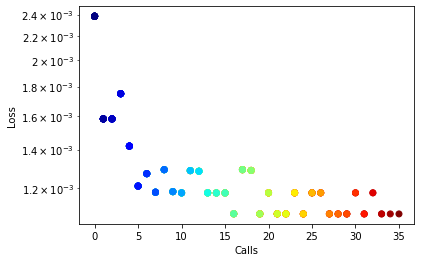

[ final_simplex: (array([[0.01404646],
       [0.01404637]]), array([0.00108285, 0.00108285]))
           fun: 0.0010828502834025985
       message: 'Optimization terminated successfully.'
          nfev: 34
           nit: 17
        status: 0
       success: True
             x: array([0.01404646])]


 20%|██        | 1/5 [00:50<03:22, 50.52s/it]

Test 0 success True
Random guess [0.012984593296863148] has loss 0.002564888313324754
Initial motor position is [0.17001869]
Initial loss is 0.002564888313324754
motors ['hkb_2'] trans [0.02258404] current loss 0.0038813308405619834


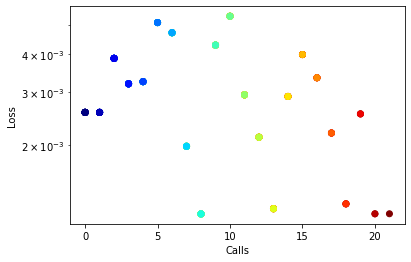

motors ['hkb_2'] trans [-0.03929542] current loss 0.003193681852813951
motors ['hkb_2'] trans [-0.03982041] current loss 0.00324712624845319
motors ['hkb_2'] trans [0.04494931] current loss 0.005107257702329285
motors ['hkb_2'] trans [0.03481983] current loss 0.004725384612741142
motors ['hkb_2'] trans [-0.0062823] current loss 0.001977840152323415
motors ['hkb_2'] trans [-0.0146972] current loss 0.0011777736995493672
motors ['hkb_2'] trans [0.02983887] current loss 0.0042970429521780994
motors ['hkb_2'] trans [0.04674034] current loss 0.005360896576039311
motors ['hkb_2'] trans [-0.03647418] current loss 0.002934540718107232
motors ['hkb_2'] trans [-0.02123586] current loss 0.002120735060512383
motors ['hkb_2'] trans [-0.01340891] current loss 0.001225938662781454
motors ['hkb_2'] trans [0.00598416] current loss 0.00289846346734882
motors ['hkb_2'] trans [-0.04998973] current loss 0.00399614496597629
motors ['hkb_2'] trans [0.01333923] current loss 0.0033450907478821935
motors ['hkb_2

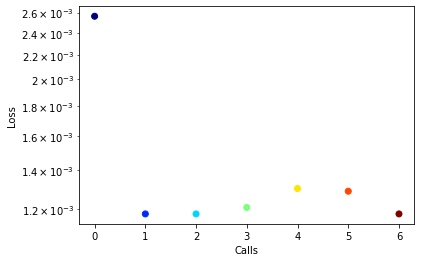

[ final_simplex: (array([[-0.0146972],
       [-0.0146972]]), array([0.00117777, 0.00117778]))
           fun: 0.001177774395369939
       message: 'Optimization terminated successfully.'
          nfev: 5
           nit: 2
        status: 0
       success: True
             x: array([-0.0146972])]


 40%|████      | 2/5 [01:28<02:09, 43.10s/it]

Test 1 success True
Random guess [-0.0019174421816774978] has loss 0.0012882488692180594
Initial motor position is [0.15511666]
Initial loss is 0.0012882488692180594
motors ['hkb_2'] trans [0.00758809] current loss 0.0025158628788599507


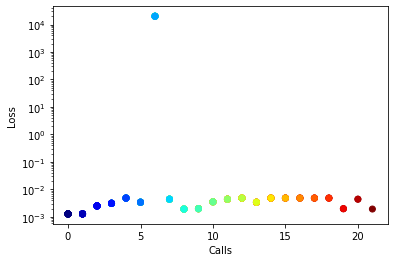

motors ['hkb_2'] trans [-0.021813] current loss 0.0031425538022661556
motors ['hkb_2'] trans [-0.04635282] current loss 0.004855432941373529
motors ['hkb_2'] trans [0.03310231] current loss 0.003432532074032588
motors ['hkb_2'] trans [-0.04875751] current loss 20000.0
motors ['hkb_2'] trans [0.04633876] current loss 0.004431094715108714
motors ['hkb_2'] trans [0.00594605] current loss 0.0019363475634367124
motors ['hkb_2'] trans [0.00888161] current loss 0.0019957562066270696
motors ['hkb_2'] trans [0.0346251] current loss 0.003534651573183308
motors ['hkb_2'] trans [0.04395807] current loss 0.004433469630160246
motors ['hkb_2'] trans [-0.04633083] current loss 0.004853716085941552
motors ['hkb_2'] trans [0.03312877] current loss 0.0034342213317379374
motors ['hkb_2'] trans [-0.04632809] current loss 0.00485652692581711
motors ['hkb_2'] trans [-0.0463287] current loss 0.004856807446023236
motors ['hkb_2'] trans [-0.04632919] current loss 0.00485686106312298
motors ['hkb_2'] trans [-0.0

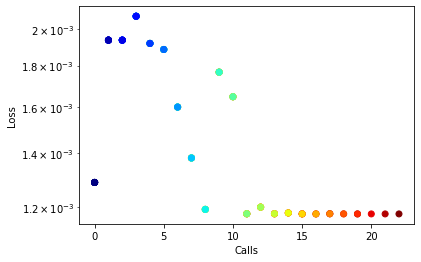

[ final_simplex: (array([[0.00028801],
       [0.00028801]]), array([0.00117724, 0.00117724]))
           fun: 0.0011772399039117955
       message: 'Optimization terminated successfully.'
          nfev: 21
           nit: 10
        status: 0
       success: True
             x: array([0.00028801])]


 60%|██████    | 3/5 [02:25<01:39, 49.59s/it]

Test 2 success True
Random guess [-0.0048976820174451985] has loss 0.0016456073131715667
Initial motor position is [0.15213642]
Initial loss is 0.0016456073131715667
motors ['hkb_2'] trans [0.03445561] current loss 0.003654427369962849


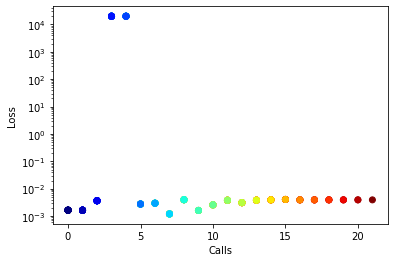

motors ['hkb_2'] trans [-0.04673637] current loss 20000.0
motors ['hkb_2'] trans [-0.04655776] current loss 20000.0
motors ['hkb_2'] trans [0.02315466] current loss 0.002765313543049964
motors ['hkb_2'] trans [0.02800973] current loss 0.0029614466633071535
motors ['hkb_2'] trans [0.00248842] current loss 0.0012048589155738948
motors ['hkb_2'] trans [-0.03190891] current loss 0.003981495894051145
motors ['hkb_2'] trans [0.00735529] current loss 0.0016117631251431456
motors ['hkb_2'] trans [0.01419446] current loss 0.0025814351749064825
motors ['hkb_2'] trans [0.04179519] current loss 0.0038053113663906414
motors ['hkb_2'] trans [-0.02046972] current loss 0.003108673091618466
motors ['hkb_2'] trans [-0.03035368] current loss 0.0038324534301292807
motors ['hkb_2'] trans [-0.02907433] current loss 0.003929623447659041
motors ['hkb_2'] trans [-0.03052054] current loss 0.0040693659765039265
motors ['hkb_2'] trans [-0.0313786] current loss 0.003928123125110832
motors ['hkb_2'] trans [-0.03137

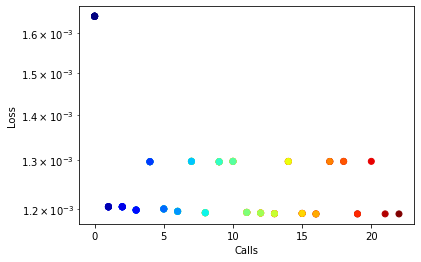

[ final_simplex: (array([[0.00270421],
       [0.00270421]]), array([0.00119084, 0.00119084]))
           fun: 0.0011908354775488632
       message: 'Optimization terminated successfully.'
          nfev: 21
           nit: 10
        status: 0
       success: True
             x: array([0.00270421])]


 80%|████████  | 4/5 [03:08<00:46, 46.92s/it]

Test 3 success True
Random guess [0.009159520780869033] has loss 0.002692833667622246
Initial motor position is [0.16619362]
Initial loss is 0.002692833667622246
motors ['hkb_2'] trans [0.03340238] current loss 0.004478271849748928


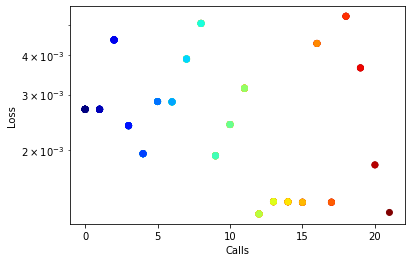

motors ['hkb_2'] trans [-0.02668279] current loss 0.0023889510210464834
motors ['hkb_2'] trans [-0.02015535] current loss 0.0019455855929772984
motors ['hkb_2'] trans [0.00894922] current loss 0.0028509494902531846
motors ['hkb_2'] trans [0.01199954] current loss 0.0028444341565512735
motors ['hkb_2'] trans [0.02978665] current loss 0.003893458754055162
motors ['hkb_2'] trans [0.04255436] current loss 0.005052774738588046
motors ['hkb_2'] trans [-0.00546009] current loss 0.0019165874237044385
motors ['hkb_2'] trans [-0.00087081] current loss 0.002409299424978173
motors ['hkb_2'] trans [-0.03289215] current loss 0.003142837931566068
motors ['hkb_2'] trans [-0.01224951] current loss 0.0012513474594012966
motors ['hkb_2'] trans [-0.012356] current loss 0.0013684385653198543
motors ['hkb_2'] trans [-0.01235393] current loss 0.0013678071961381864
motors ['hkb_2'] trans [-0.01229956] current loss 0.0013627359433857073
motors ['hkb_2'] trans [-0.04999772] current loss 0.004363736412956598
mot

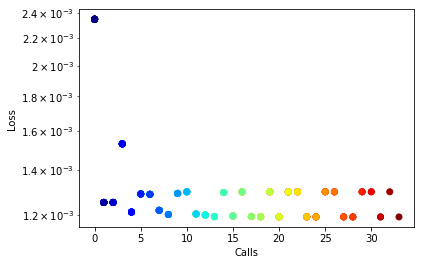

[ final_simplex: (array([[-0.01135248],
       [-0.01135251]]), array([0.00119071, 0.00119071]))
           fun: 0.001190711963391111
       message: 'Optimization terminated successfully.'
          nfev: 32
           nit: 16
        status: 0
       success: True
             x: array([-0.01135248])]


100%|██████████| 5/5 [04:00<00:00, 48.06s/it]

Test 4 success True


In [66]:
N_RUNS = 5

initial_centroids = []
initial_out_beams = []
absolute_movements = []

start_guesses = []
overall_successes = []
final_centroids = []
final_out_beams = []



for outer in tqdm(range(N_RUNS)):
    focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)
    opt_trial = SkoptGaussianProcessOptimizer(focusing_system, 
                                              motor_types=move_motors, 
                                              random_seed=DEFAULT_RANDOM_SEED, 
                                              loss_parameters=['centroid', 'fwhm'],
                                              loss_min_value=5e-6)
    random_inits = opt_trial.get_random_init(guess_range=[[-0.04, 0.04]])
    
    absolute_movements.append(initial_absolute_positions + random_inits)
    
    print("Initial motor position is", absolute_movements[-1])
    opt_trial.initial_motor_positions =  absolute_movements[-1]
    #deltax_callback = DeltaXStopper(configs.DEFAULT_MOTOR_TOLERANCES['hkb_4'] / configs.DEFAULT_MOTOR_RESOLUTIONS['hkb_4'])
    #deltay_callback = DeltaYStopper(configs.DEFAULT_LOSS_TOLERANCES['centroid'])
    plot_callback = LivePlotCallback(opt_trial)
    opt_trial.set_optimizer_options(callback = [plot_callback.call], xi=5e-4, kappa=0.1, n_calls=20, bounds=[-0.05, 0.05])
    opt_results, guesses, solution, success = opt_trial.trials(verbose=True)
    print("Solution is", solution)
    plot_callback.close()
    
    if not success:
        print('Trying Nelder-Mead from minimum position')
        focusing_system = movers.move_motors(focusing_system, move_motors, 
                                             absolute_movements[-1],
                                             movement='absolute')
        opt_trial = ScipyOptimizer(focusing_system, 
                                   motor_types=move_motors, 
                                   random_seed=DEFAULT_RANDOM_SEED, 
                                   loss_parameters=['centroid', 'fwhm'],
                                   loss_min_value=5e-6)
        plot_callback = LivePlotCallback(opt_trial)
        opt_trial.set_optimizer_options(callback = plot_callback.call)
        opt_results, guesses, solution, success = opt_trial.trials(1, initial_guess=solution[0],
                                                                   verbose=False, 
                                                                   accept_all_solutions=True)
        focusing_system = opt_trial.focusing_system
        plot_callback.close()
        print(opt_results)
    start_guesses.append(guesses)
    overall_successes.append(success)
    centroid, out_beam, *_ = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    final_centroids.append(centroid)
    final_out_beams.append(out_beam)
    print(f'Test {outer} success {success}')

In [67]:
initial_out_beams = []
initial_hists = []
initial_dws = []
for mov in absolute_movements:
    focusing_system = movers.move_motors(focusing_system, move_motors, mov, movement='absolute')
    beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system=focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    initial_out_beams.append(beam)
    initial_hists.append(hist)
    initial_dws.append(dw)

In [68]:
initial_peaks = [dw.get_parameter('peak_intensity') for dw in initial_dws]
initial_h_fwhms = [dw.get_parameter('h_fwhm') for dw in initial_dws]
initial_v_fwhms = [dw.get_parameter('v_fwhm') for dw in initial_dws]

In [69]:
final_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in final_out_beams]
final_hists, final_dws = zip(*final_hists_dws)

In [70]:
final_peaks = [dw.get_parameter('peak_intensity') for dw in final_dws]
final_h_fwhms = [dw.get_parameter('h_fwhm') for dw in final_dws]
final_v_fwhms = [dw.get_parameter('v_fwhm') for dw in final_dws]

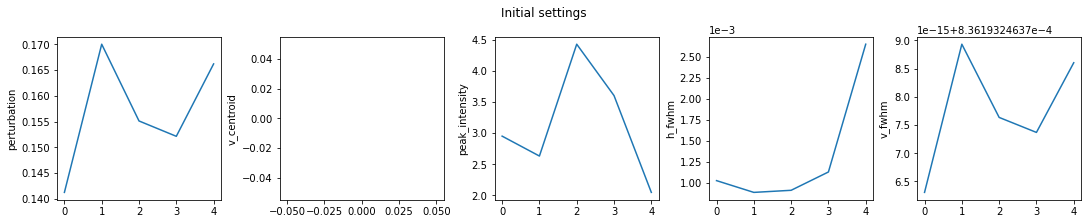

In [71]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes[0].plot(absolute_movements)
axes[0].set_ylabel('perturbation')

axes[1].plot(initial_centroids)
axes[1].set_ylabel('v_centroid')

axes[2].plot(initial_peaks)
axes[2].set_ylabel('peak_intensity')

axes[3].plot(initial_h_fwhms)
axes[3].set_ylabel('h_fwhm')
axes[3].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[4].plot(initial_v_fwhms)
axes[4].set_ylabel('v_fwhm')
axes[4].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('Initial settings')
fig.savefig(f'{fig_save_path}/initial_metrics.png', bbox_inches='tight')

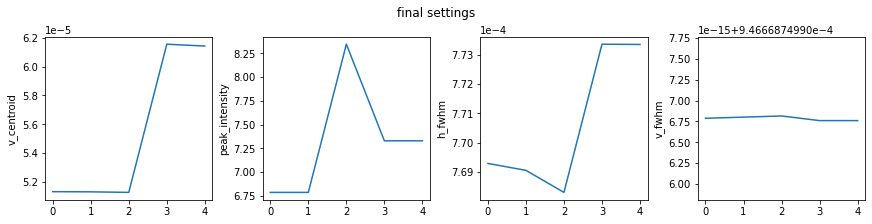

In [72]:
fig, axes = plt.subplots(1, 4, figsize=[12,3], constrained_layout=True)

axes[0].plot(final_centroids)
axes[0].set_ylabel('v_centroid')

axes[1].plot(final_peaks)
axes[1].set_ylabel('peak_intensity')

axes[2].plot(final_h_fwhms)
axes[2].set_ylabel('h_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[3].plot(final_v_fwhms)
axes[3].set_ylabel('v_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('final settings')
fig.savefig(f'{fig_save_path}/final_metrics.png', bbox_inches='tight')

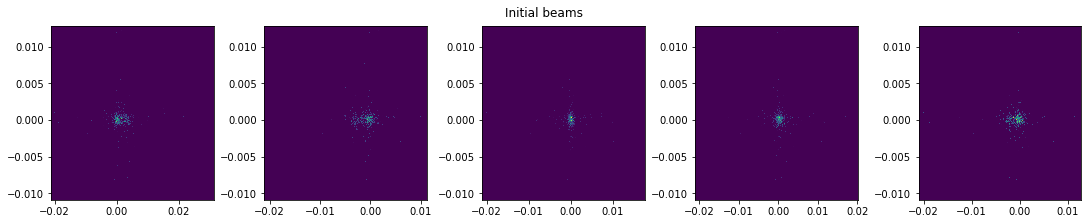

In [73]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(initial_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D)
    
    
fig.suptitle('Initial beams')
fig.savefig(f'{fig_save_path}/initial_beams.png', bbox_inches='tight')

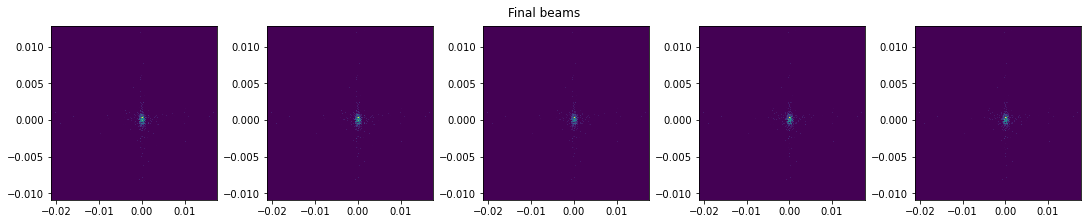

In [74]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(final_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D)
    
    
fig.suptitle('Final beams')
fig.savefig(f'{fig_save_path}/final_beams.png', bbox_inches='tight')

In [75]:
clean_up()